## Kth Derivative 

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def binomial_coefficient(k,i):
    coef = np.math.factorial(k)/(np.math.factorial(i)*np.math.factorial(k-i))
    return coef

def kth_derivative(k,y,method='forward'):
    
    if method == 'forward':
        
        y_prime = []
        h = x[1] - x[0]
        
        for n in range(len(y)-k):
            sum = 0
            for i in range(k+1):
                
                coef = binomial_coefficient(k,i)
                
                sum += ((-1)**i)*coef*y[n+(k-i)]
            
            y_prime += [sum/(h**k)]
            
        return y_prime
    
    elif method == 'backward':
        
        y_prime = []
        h = x[1] - x[0]
        
        for n in range(k, len(y)):
            sum = 0
            for i in range(k+1):
                
                coef = binomial_coefficient(k,i)
                
                sum += ((-1)**i)*coef*y[n-i]
            
            y_prime += [sum/(h**k)]
            
        return y_prime

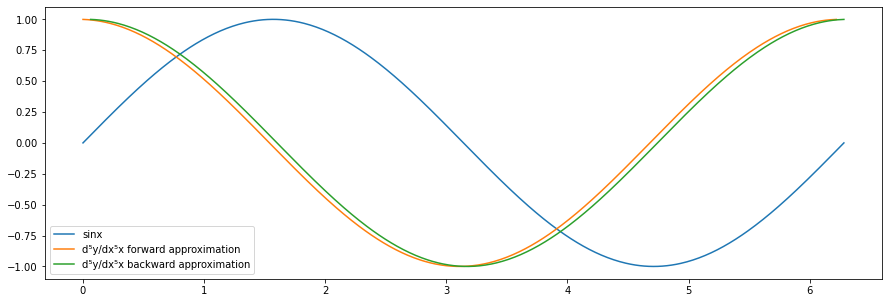

In [8]:
import matplotlib.pyplot as plt

w = 500
k = 5
x = np.linspace(0,2*np.pi,w)
y = np.sin(x)

plt.figure(figsize=(15,5))

plt.plot(x,y, label='sinx')

y_prime_forward = kth_derivative(k,y,method='forward')
y_prime_backward = kth_derivative(k,y,method='backward')

#need to make sure they are the same length
#expect them to be the same for 4th derivative as w increases since 4th derivatove of sinx is sinx
x_cut_forward = x[:len(y_prime_forward)]
x_cut_backward = x[k:len(y)]

plt.plot(x_cut_forward,y_prime_forward,label='d\u2075y/dx\u2075x forward approximation')
plt.plot(x_cut_backward,y_prime_backward,label='d\u2075y/dx\u2075x backward approximation')
plt.legend(prop={'size':10});

## Finite Difference

In [9]:
def func(x):
    return np.sin(x)

def Finite_Difference(a,h,method='forward'):
    # a is the point we want to compute the derivative at
    if method == 'central':
        return (func(a + h) - func(a - h))/(2*h)
    elif method == 'forward':
        return (func(a + h) - func(a))/h
    elif method == 'backward':
        return (func(a) - func(a - h))/h
    else:
        raise ValueError("Method must be either 'central', 'forward' or 'backward'.")


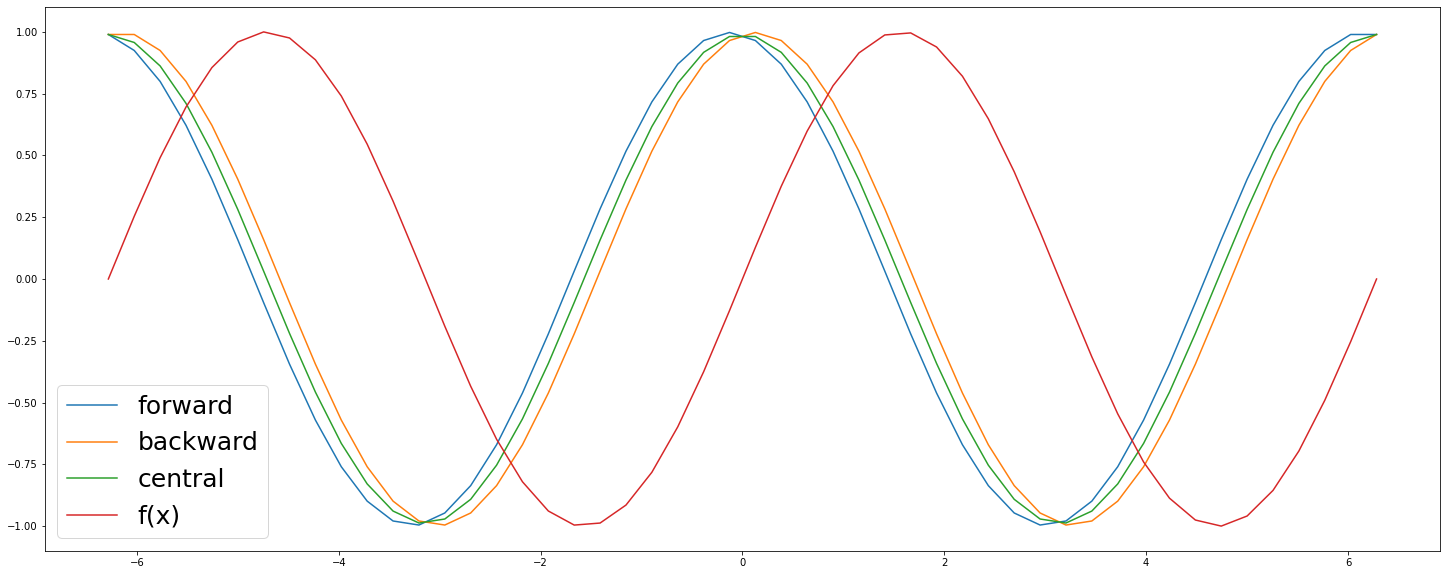

In [11]:
x = np.linspace(-2*np.pi,2*np.pi,50)
y = func(x)

plt.figure(figsize=(25,10))

for method in ['forward','backward','central']:
    y_prime = []
    for i in range(len(x)):
        h = x[1] - x[0]
        y_prime += [Finite_Difference(x[i], h, method=method)]

    plt.plot(x,y_prime, label=method)

plt.plot(x,y, label='f(x)')
plt.legend(prop={'size':25});

## Example - Session 6 - Task C

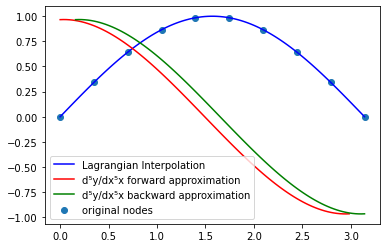

In [14]:
def Lagrangian(j, xp, xn):
    
    #xp is a point
    #xn is an array of points
    
    L = 1
    n = len(xn)
    
    for k in range(n):
        if k != j:
            L *= (xp-xn[k])/(xn[j]-xn[k])
    
    return L

def LagrInterp(xn,yn,x):
    
    #xn and yn represent the nodes we know 
    #x represents the points we are trying to interpolate for
    
    y = []
    n = len(yn)

    for i in range(len(x)):
        
        #this loop is to go through all the points we are trying to interpolate for
        
        p = 0
        
        for j in range(n):
        
            p += Lagrangian(j, x[i], xn) * yn[j]
            
        y += [p]
        
    return y    

xn = np.linspace(0,np.pi,10)
yn = np.sin(xn)
plt.scatter(xn,yn, label='original nodes')

x = np.linspace(0,np.pi,100)
y = LagrInterp(xn, yn, x)

plt.plot(x,y, c='blue', label = 'Lagrangian Interpolation')

k = 5
y_prime_5_forward = kth_derivative(k, y, method='forward')
y_prime_5_backward = kth_derivative(k, y, method='backward')

plt.plot(x[:len(y_prime_5_forward)],y_prime_5_forward, c='red', label='d\u2075y/dx\u2075x forward approximation')
plt.plot(x[k:len(y)], y_prime_5_backward, c='green', label='d\u2075y/dx\u2075x backward approximation')

plt.legend();